In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Training/Corilia/Logistic regression/heart.csv')
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


## **Converting to numerical data**

In [3]:
df_dummies = pd.get_dummies(df, columns=['Sex' , 'ChestPainType' , 'RestingECG' , 'ExerciseAngina' , 'ST_Slope'] , drop_first=True)
df_dummies.tail()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0
917,38,138,175,0,173,0.0,0,1,0,1,0,1,0,0,0,1


In [4]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(6), u

# Handling outliers

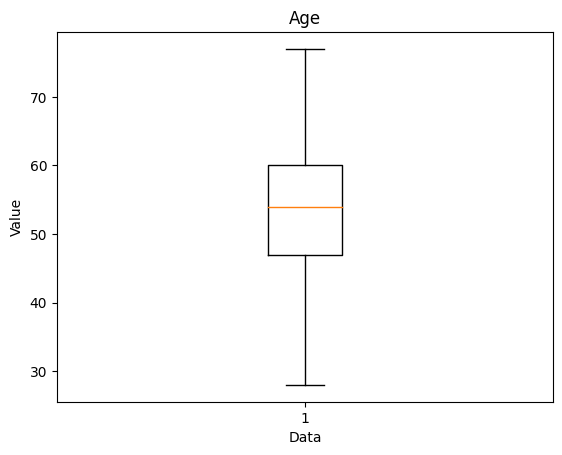

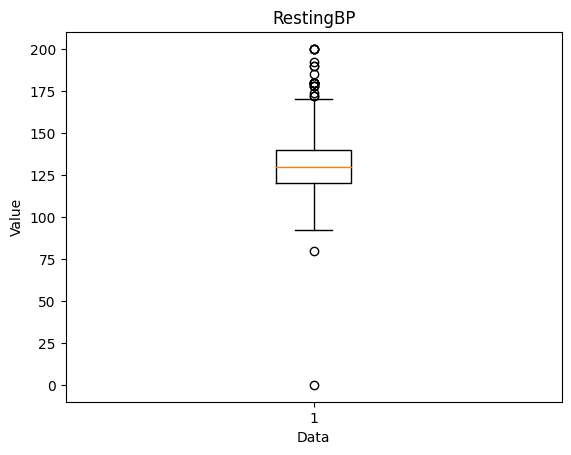

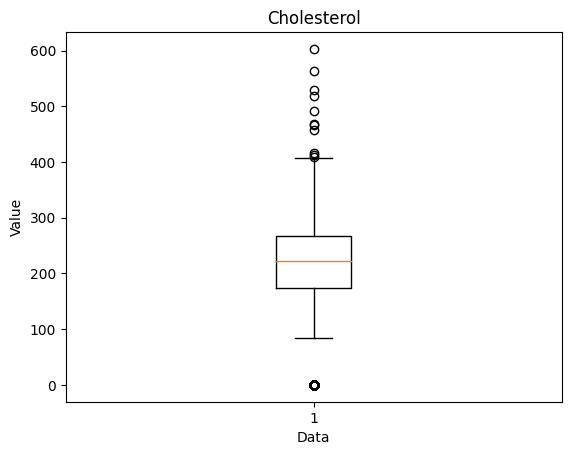

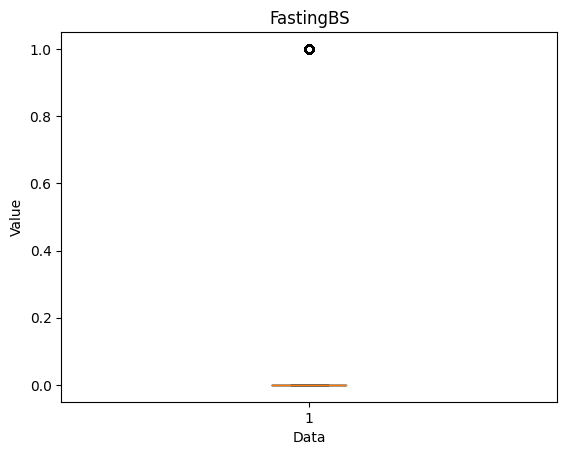

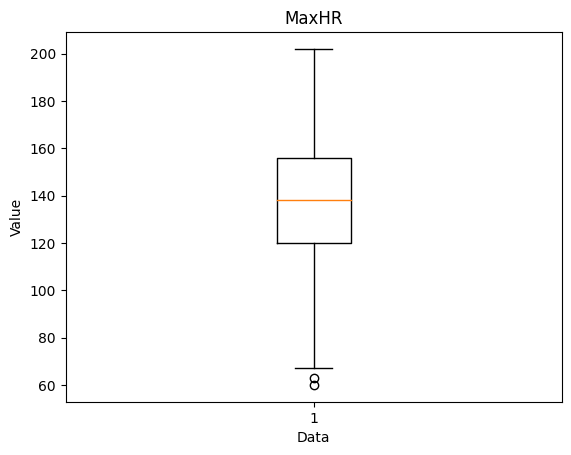

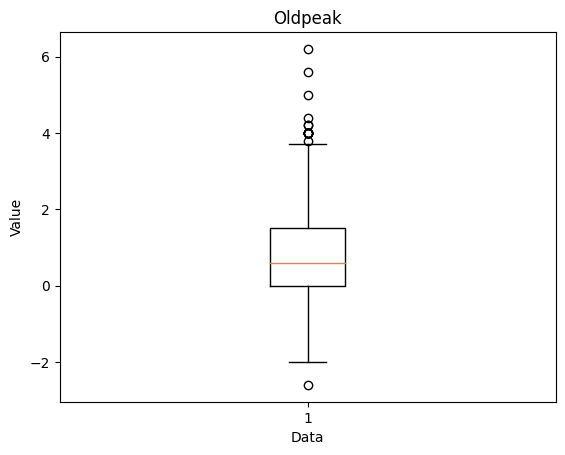

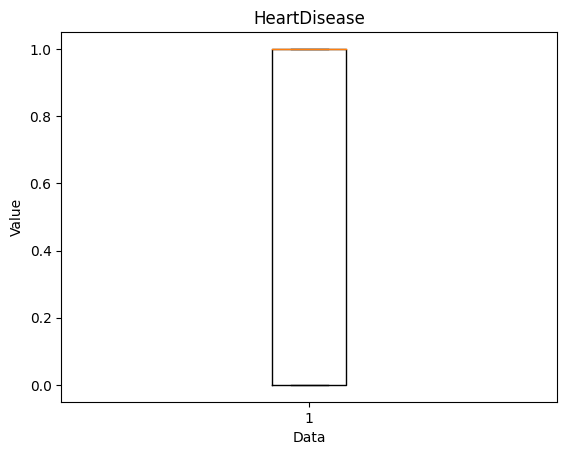

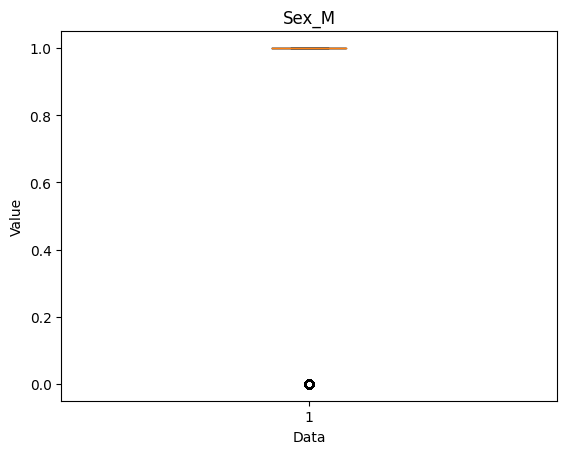

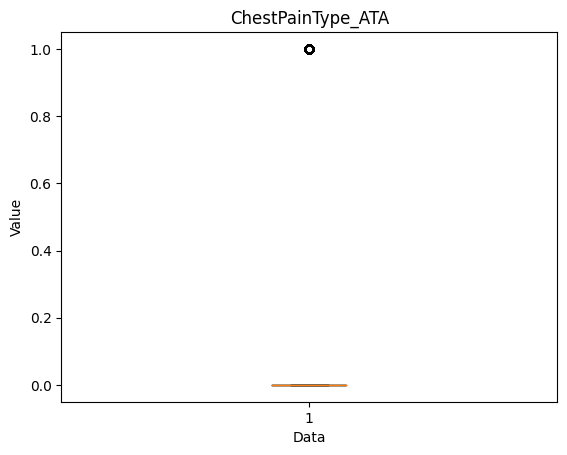

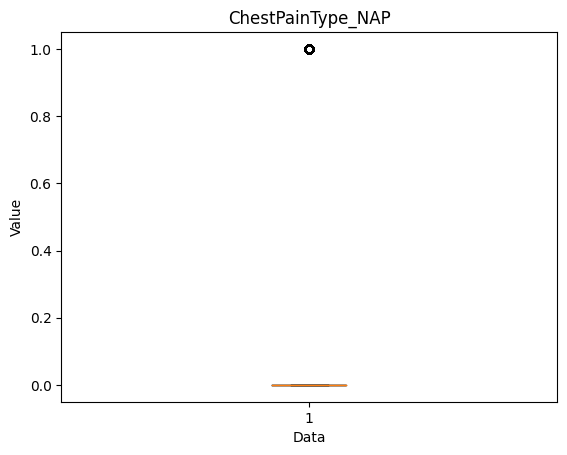

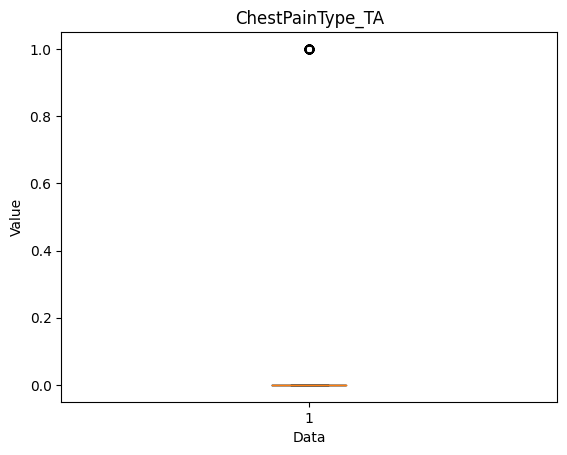

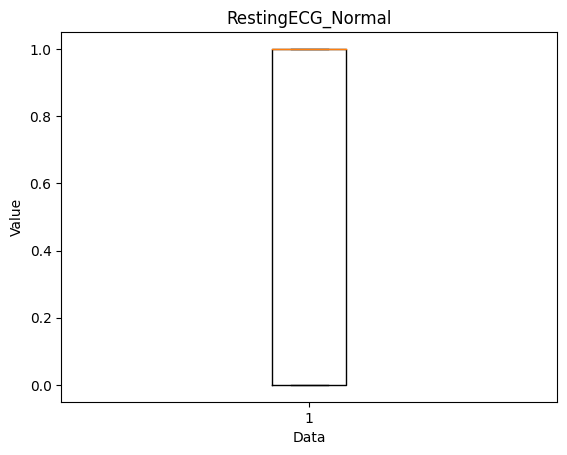

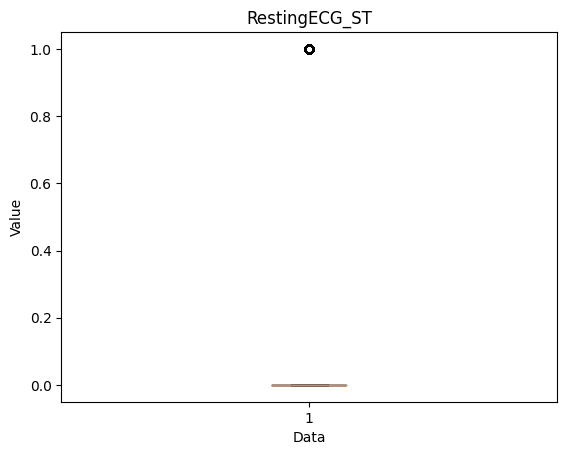

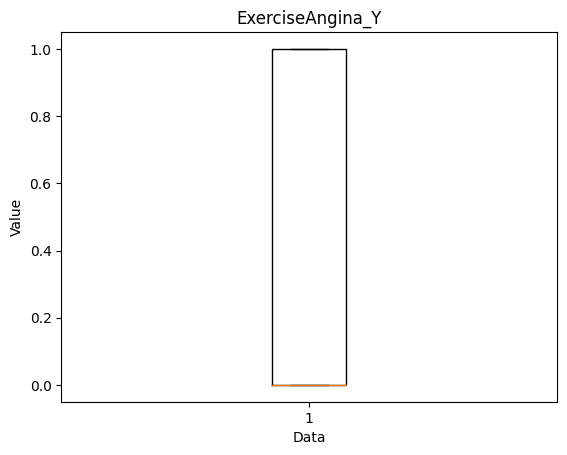

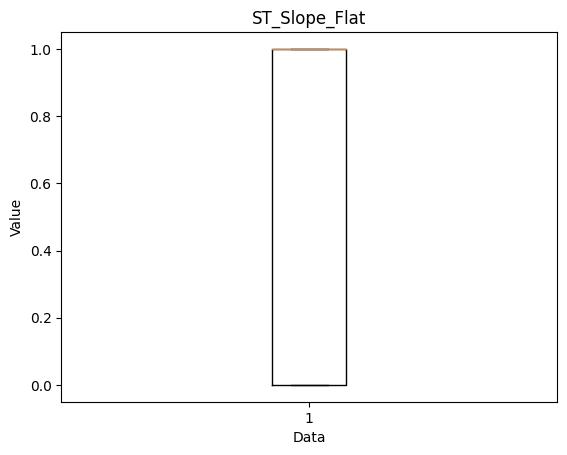

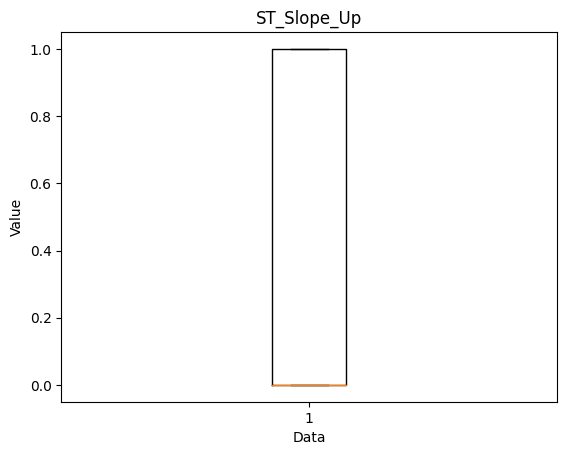

In [5]:
import matplotlib.pyplot as plt
import numpy as np
my_columns = df_dummies.columns
for c in my_columns:
  x = np.array(df_dummies[c])
  plt.boxplot(x)

  plt.xlabel("Data")
  plt.ylabel("Value")
  plt.title(c)

  plt.show()

In [6]:
df_dummies = df_dummies[df_dummies['Cholesterol'] != 0]

In [7]:
df_dummies = df_dummies[df_dummies['RestingBP'] != 0]

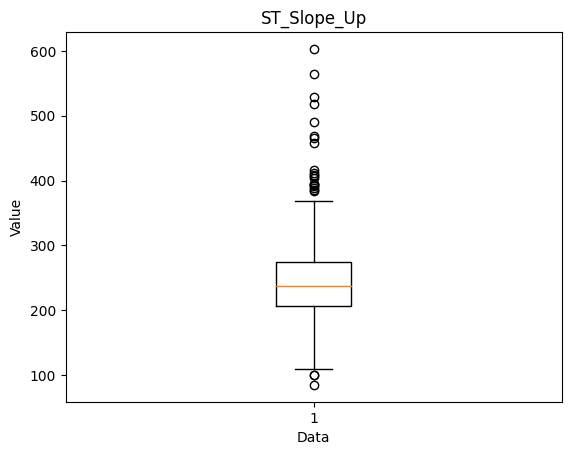

In [8]:
x = np.array(df_dummies['Cholesterol'])
plt.boxplot(x)
plt.xlabel("Data")
plt.ylabel("Value")
plt.title(c)
plt.show()

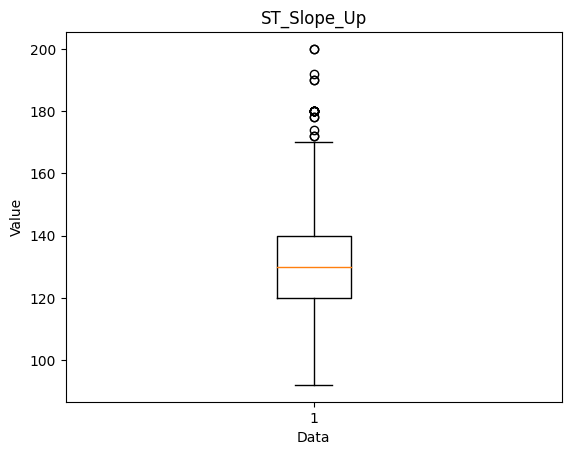

In [9]:
x = np.array(df_dummies['RestingBP'])
plt.boxplot(x)
plt.xlabel("Data")
plt.ylabel("Value")
plt.title(c)
plt.show()

In [10]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                746 non-null    int64  
 1   RestingBP          746 non-null    int64  
 2   Cholesterol        746 non-null    int64  
 3   FastingBS          746 non-null    int64  
 4   MaxHR              746 non-null    int64  
 5   Oldpeak            746 non-null    float64
 6   HeartDisease       746 non-null    int64  
 7   Sex_M              746 non-null    uint8  
 8   ChestPainType_ATA  746 non-null    uint8  
 9   ChestPainType_NAP  746 non-null    uint8  
 10  ChestPainType_TA   746 non-null    uint8  
 11  RestingECG_Normal  746 non-null    uint8  
 12  RestingECG_ST      746 non-null    uint8  
 13  ExerciseAngina_Y   746 non-null    uint8  
 14  ST_Slope_Flat      746 non-null    uint8  
 15  ST_Slope_Up        746 non-null    uint8  
dtypes: float64(1), int64(6), u

In [11]:
print(f'shape before anything : {df.shape} , after : {df_dummies.shape}')

shape before anything : (918, 12) , after : (746, 16)


In [12]:
df_dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


## **Standardization**

In [13]:
from sklearn.preprocessing import StandardScaler
df_standardized = df_dummies.copy()
my_columns = ['RestingBP' , 'Cholesterol' , 'MaxHR' , 'Oldpeak']
scaler = StandardScaler()

for column in my_columns:
    df_standardized[column] = scaler.fit_transform(df_standardized[[column]])
df_standardized.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 746 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                746 non-null    int64  
 1   RestingBP          746 non-null    float64
 2   Cholesterol        746 non-null    float64
 3   FastingBS          746 non-null    int64  
 4   MaxHR              746 non-null    float64
 5   Oldpeak            746 non-null    float64
 6   HeartDisease       746 non-null    int64  
 7   Sex_M              746 non-null    uint8  
 8   ChestPainType_ATA  746 non-null    uint8  
 9   ChestPainType_NAP  746 non-null    uint8  
 10  ChestPainType_TA   746 non-null    uint8  
 11  RestingECG_Normal  746 non-null    uint8  
 12  RestingECG_ST      746 non-null    uint8  
 13  ExerciseAngina_Y   746 non-null    uint8  
 14  ST_Slope_Flat      746 non-null    uint8  
 15  ST_Slope_Up        746 non-null    uint8  
dtypes: float64(4), int64(3), u

In [14]:
from scipy.stats import chi2_contingency

def chi_squared_test(data, feature, target):
  """Performs a chi-squared test for independence between a feature and a target variable.

  Args:
    data: A Pandas DataFrame containing the data.
    feature: The feature to test.
    target: The target variable.

  Returns:
    A tuple containing the chi-squared test statistic and the p-value.
  """

  contingency_table = pd.crosstab(data[feature], data[target])
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)

  return chi2, p_value

# Example usage:

for c in df_dummies.columns:
  chi2, p_value = chi_squared_test(df_dummies, c, 'HeartDisease')
  print(c)
  print("Chi-squared test statistic:", chi2)
  print("p-value:", p_value )
  if p_value < 0.05:
    print("Reject the null hypothesis.\n")
  else:
    print("Do not reject the null hypothesis.\n")

Age
Chi-squared test statistic: 110.19230936608245
p-value: 8.536322281715872e-07
Reject the null hypothesis.

RestingBP
Chi-squared test statistic: 86.99766107900338
p-value: 0.01984497729062882
Reject the null hypothesis.

Cholesterol
Chi-squared test statistic: 236.50400804251927
p-value: 0.21198970166989678
Do not reject the null hypothesis.

FastingBS
Chi-squared test statistic: 18.388424831836467
p-value: 1.8014903238899403e-05
Reject the null hypothesis.

MaxHR
Chi-squared test statistic: 189.3672621337935
p-value: 2.1651574589153628e-06
Reject the null hypothesis.

Oldpeak
Chi-squared test statistic: 230.81489960573296
p-value: 6.598651742072271e-28
Reject the null hypothesis.

HeartDisease
Chi-squared test statistic: 741.9970581447956
p-value: 2.2056756748930776e-163
Reject the null hypothesis.

Sex_M
Chi-squared test statistic: 62.58908315427757
p-value: 2.5466116402861134e-15
Reject the null hypothesis.

ChestPainType_ATA
Chi-squared test statistic: 103.46076253229174
p-valu

In [15]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = np.array(df_standardized[['Age' , 'RestingBP' , 'FastingBS' , 'MaxHR' , 'Oldpeak' , 'Sex_M' , 'ChestPainType_ATA' , 'ChestPainType_NAP' , 'RestingECG_Normal' , 'RestingECG_ST' , 'ExerciseAngina_Y' , 'ST_Slope_Flat' , 'ST_Slope_Up']])
y = np.array(df_standardized['HeartDisease'])
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8 ,test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_train)
predictions2 = model.predict(X_test)

accuracy = np.sum(predictions == y_train) / len(y_train)
accuracy2 = np.sum(predictions2 == y_test) / len(y_test)


print("training Accuracy:", accuracy*100)
print("testing Accuracy:", accuracy2*100)


training Accuracy: 86.0738255033557
testing Accuracy: 91.33333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
x = np.array(df_standardized[['Age' , 'RestingBP' , 'FastingBS' , 'MaxHR' , 'Oldpeak' , 'Sex_M' , 'ChestPainType_ATA' , 'ChestPainType_NAP' , 'RestingECG_Normal' , 'RestingECG_ST' , 'ExerciseAngina_Y' , 'ST_Slope_Flat' , 'ST_Slope_Up']])
y = np.array(df_standardized['HeartDisease'])
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75 ,test_size=0.25, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_train)
predictions2 = model.predict(X_test)

accuracy = np.sum(predictions == y_train) / len(y_train)
accuracy2 = np.sum(predictions2 == y_test) / len(y_test)


print("training Accuracy:", accuracy*100)
print("testing Accuracy:", accuracy2*100)


training Accuracy: 86.22540250447227
testing Accuracy: 89.83957219251337


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
df_standardized.to_csv('/content/drive/MyDrive/Training/Corilia/Logistic regression/clean_heart_data.csv')

In [18]:
df_standardized.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.259865,0.058758,0.241338,-0.382112,0.286006,0.298617,0.040917,-0.229820,-0.022271,0.050671,-0.238592,0.109853,0.245908,0.202548,-0.272296
RestingBP,0.259865,1.000000,0.095939,0.173765,-0.125774,0.198575,0.173242,0.034363,-0.076092,-0.054299,0.065069,-0.086085,0.086690,0.161035,0.081746,-0.127077
Cholesterol,0.058758,0.095939,1.000000,0.054012,-0.019856,0.058488,0.103866,-0.107045,-0.015945,-0.068441,-0.050253,-0.046950,-0.028806,0.086768,0.103996,-0.099063
FastingBS,0.241338,0.173765,0.054012,1.000000,-0.102710,0.055568,0.160594,0.096075,-0.093325,0.005850,0.049295,-0.165081,0.135072,0.109995,0.105542,-0.147309
MaxHR,-0.382112,-0.125774,-0.019856,-0.102710,1.000000,-0.259533,-0.377212,-0.157002,0.243329,0.152321,0.091131,0.039154,-0.159973,-0.396289,-0.346152,0.382786
Oldpeak,0.286006,0.198575,0.058488,0.055568,-0.259533,1.000000,0.495696,0.125743,-0.303200,-0.135819,0.042978,-0.130778,0.062598,0.465491,0.370642,-0.553175
HeartDisease,0.298617,0.173242,0.103866,0.160594,-0.377212,0.495696,1.000000,0.292779,-0.375634,-0.222146,-0.053765,-0.133255,0.095921,0.551834,0.591554,-0.653759
Sex_M,0.040917,0.034363,-0.107045,0.096075,-0.157002,0.125743,0.292779,1.000000,-0.138835,-0.080302,0.013732,-0.002763,0.037574,0.192579,0.102288,-0.136713
ChestPainType_ATA,-0.229820,-0.076092,-0.015945,-0.093325,0.243329,-0.303200,-0.375634,-0.138835,1.000000,-0.289531,-0.129014,0.131242,-0.032920,-0.317049,-0.314773,0.363901
ChestPainType_NAP,-0.022271,-0.054299,-0.068441,0.005850,0.152321,-0.135819,-0.222146,-0.080302,-0.289531,1.000000,-0.130513,0.027344,-0.062745,-0.197576,-0.091037,0.115120
